# What makes a sucessful country?

## Background

Different countries have different levels of success in the Olympic Games but what makes one country more successful than another? The following factors will be analysed:
* How selected countries progress over time
* Are wealthier countries more successful?
* Does a larger population result in a more successful team?

### Import modules

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import pearsonr

### Development of countries over time

In [69]:
medal_tally = pd.read_csv('Olympic_Games_Medal_Tally.csv')
medal_tally['Olympics'] = medal_tally.edition.str[-15:]
medal_tally_summer = medal_tally[medal_tally.Olympics == 'Summer Olympics']

print(medal_tally_summer.head())

                edition  edition_id  year        country country_noc  gold  \
0  1896 Summer Olympics           1  1896  United States         USA    11   
1  1896 Summer Olympics           1  1896         Greece         GRE    10   
2  1896 Summer Olympics           1  1896        Germany         GER     6   
3  1896 Summer Olympics           1  1896         France         FRA     5   
4  1896 Summer Olympics           1  1896  Great Britain         GBR     2   

   silver  bronze  total         Olympics  
0       7       2     20  Summer Olympics  
1      18      19     47  Summer Olympics  
2       5       2     13  Summer Olympics  
3       4       2     11  Summer Olympics  
4       3       2      7  Summer Olympics  


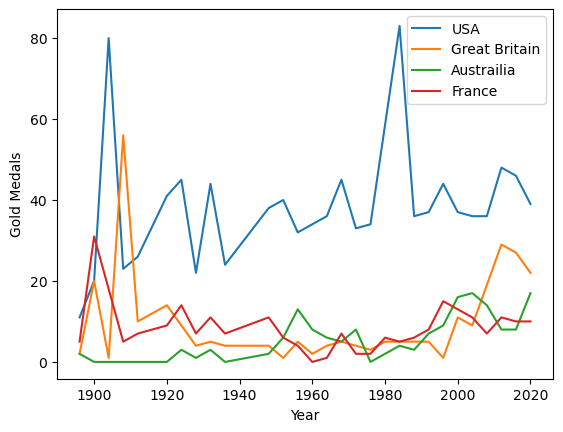

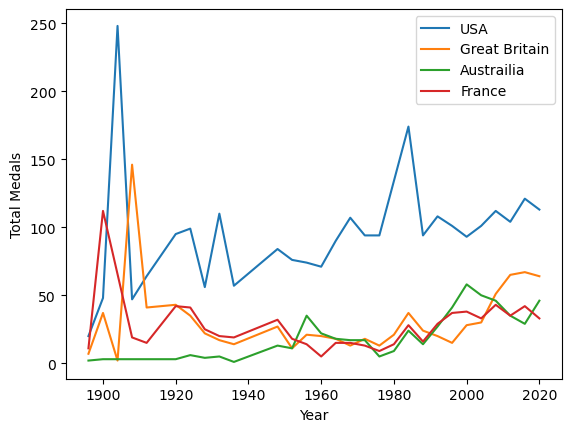

<Figure size 640x480 with 0 Axes>

In [70]:
plt.plot(medal_tally_summer[medal_tally_summer.country == 'United States'].year, medal_tally_summer[medal_tally_summer.country == 'United States'].gold)
plt.plot(medal_tally_summer[medal_tally_summer.country == 'Great Britain'].year, medal_tally_summer[medal_tally_summer.country == 'Great Britain'].gold)
plt.plot(medal_tally_summer[medal_tally_summer.country == 'Australia'].year, medal_tally_summer[medal_tally_summer.country == 'Australia'].gold)
plt.plot(medal_tally_summer[medal_tally_summer.country == 'France'].year, medal_tally_summer[medal_tally_summer.country == 'France'].gold)
plt.legend(['USA', 'Great Britain', 'Austrailia', 'France'])
plt.xlabel('Year')
plt.ylabel('Gold Medals')
plt.show()
plt.clf()

plt.plot(medal_tally_summer[medal_tally_summer.country == 'United States'].year, medal_tally_summer[medal_tally_summer.country == 'United States'].total)
plt.plot(medal_tally_summer[medal_tally_summer.country == 'Great Britain'].year, medal_tally_summer[medal_tally_summer.country == 'Great Britain'].total)
plt.plot(medal_tally_summer[medal_tally_summer.country == 'Australia'].year, medal_tally_summer[medal_tally_summer.country == 'Australia'].total)
plt.plot(medal_tally_summer[medal_tally_summer.country == 'France'].year, medal_tally_summer[medal_tally_summer.country == 'France'].total)
plt.legend(['USA', 'Great Britain', 'Austrailia', 'France'])
plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.show()
plt.clf()

In general, there is limited progression in the total number of medals and gold medals over time for the selected countries. However, there is a noticable increase in the medal totals when the Olympics is held in that country.

In [71]:
GDP = pd.read_csv('GDP_correct.csv')
GDP_melt = GDP.melt(id_vars='Country', value_vars = ['2004', '2008', '2012', '2016'], value_name = 'GDP', var_name = 'year')
print(GDP_melt.head())

population = pd.read_csv('population_correct.csv')
population_melt = population.melt(id_vars='Country', value_vars = ['2004', '2008', '2012', '2016'], value_name = 'population', var_name = 'year')
print(population_melt.head())
print(population_melt.year.unique())

               Country  year     GDP
0          Afghanistan  2004   5.971
1              Albania  2004   7.452
2              Algeria  2004  85.016
3               Angola  2004    19.8
4  Antigua and Barbuda  2004   0.818
       Country  year  population
0  Afghanistan  2004    23270000
1      Albania  2004     3109000
2      Algeria  2004    32393000
3      Andorra  2004       72000
4       Angola  2004    18262000
['2004' '2008' '2012' '2016']


In [72]:
GDP_population = pd.merge(GDP_melt, population_melt, how='outer')
GDP_population['year'] = GDP_population['year'].astype('int64')
GDP_population['GDP'] = GDP_population['GDP'].str.replace(',', '', regex=True)
GDP_population['GDP'] = GDP_population['GDP'].astype('float')

medal_tally_2004_2016 = medal_tally_summer[(medal_tally_summer.year >= 2004) & (medal_tally_summer.year < 2020)]


medals_GDP_population = pd.merge(medal_tally_2004_2016, GDP_population, how='left', left_on=[medal_tally_2004_2016.country, medal_tally_2004_2016.year], right_on=[GDP_population.Country, GDP_population.year])
medals_GDP_population = medals_GDP_population.dropna(subset = ['year_y'])
medals_GDP_population = medals_GDP_population.dropna(subset = ['gold'])
medals_GDP_population = medals_GDP_population.dropna(subset = ['total'])
medals_GDP_population = medals_GDP_population.dropna(subset = ['GDP'])
medals_GDP_population = medals_GDP_population.dropna(subset = ['population'])

print(medals_GDP_population.head())
print(medals_GDP_population.info())

                        key_0  key_1               edition  edition_id  \
0               United States   2004  2004 Summer Olympics          26   
1  People's Republic of China   2004  2004 Summer Olympics          26   
2          Russian Federation   2004  2004 Summer Olympics          26   
3                   Australia   2004  2004 Summer Olympics          26   
4                       Japan   2004  2004 Summer Olympics          26   

   year_x                     country country_noc  gold  silver  bronze  \
0    2004               United States         USA    36      39      26   
1    2004  People's Republic of China         CHN    32      17      14   
2    2004          Russian Federation         RUS    28      26      36   
3    2004                   Australia         AUS    17      16      17   
4    2004                       Japan         JPN    16       9      12   

   total         Olympics                     Country  year_y        GDP  \
0    101  Summer Olympics   

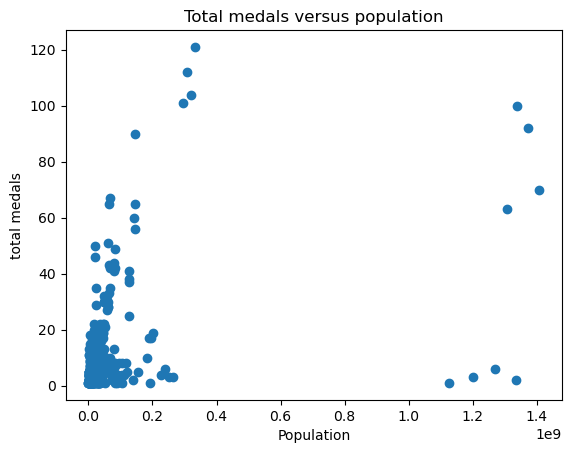

Pearson correlation: 0.40747665605897193
                          key_0  key_1               edition  edition_id  \
1    People's Republic of China   2004  2004 Summer Olympics          26   
65                        India   2004  2004 Summer Olympics          26   
74   People's Republic of China   2008  2008 Summer Olympics          53   
124                       India   2008  2008 Summer Olympics          53   
162  People's Republic of China   2012  2012 Summer Olympics          54   
217                       India   2012  2012 Summer Olympics          54   
249  People's Republic of China   2016  2016 Summer Olympics          59   
313                       India   2016  2016 Summer Olympics          59   

     year_x                     country country_noc  gold  silver  bronze  \
1      2004  People's Republic of China         CHN    32      17      14   
65     2004                       India         IND     0       1       0   
74     2008  People's Republic of China    

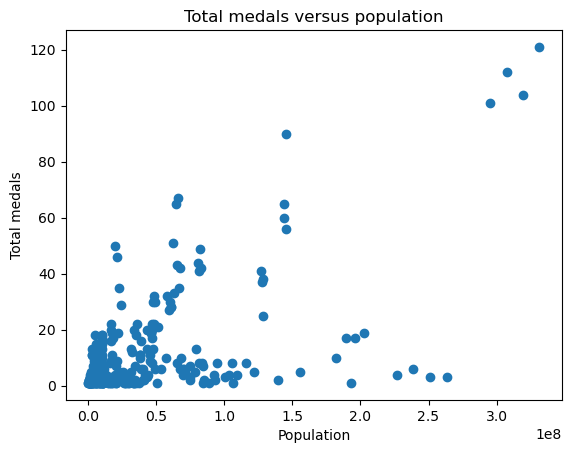

Pearson correlation: 0.5918811093106676


<Figure size 640x480 with 0 Axes>

In [73]:
plt.scatter(medals_GDP_population.population, medals_GDP_population.total)
plt.xlabel('Population')
plt.ylabel('total medals')
plt.title('Total medals versus population')
plt.show()
plt.clf()

corr, p = pearsonr(medals_GDP_population.population, medals_GDP_population.total)
print('Pearson correlation:', corr)

high_population = medals_GDP_population[medals_GDP_population.population > 1000000000]
print(high_population)

medals_GDP_population_trimmed = medals_GDP_population[medals_GDP_population.population < 1000000000]

plt.scatter(medals_GDP_population_trimmed.population, medals_GDP_population_trimmed.total)
plt.xlabel('Population')
plt.ylabel('Total medals')
plt.title('Total medals versus population')
plt.show()
plt.clf()

corr, p = pearsonr(medals_GDP_population_trimmed.population, medals_GDP_population_trimmed.total)
print('Pearson correlation:', corr)

* The appears to be a positive correlation between the total number of medals won by a Country and their population with larger countries collecting more medals.
* This relationship have a Pearson correlation of 0.41 showing that there is a association between the two variables
* There are 8 outliers in the data. Closer inspection found these to be The People's Republic of China and India. 
* If these outliers are removed the Pearson correlation increases to 0.59 showing a much stronger relationship.

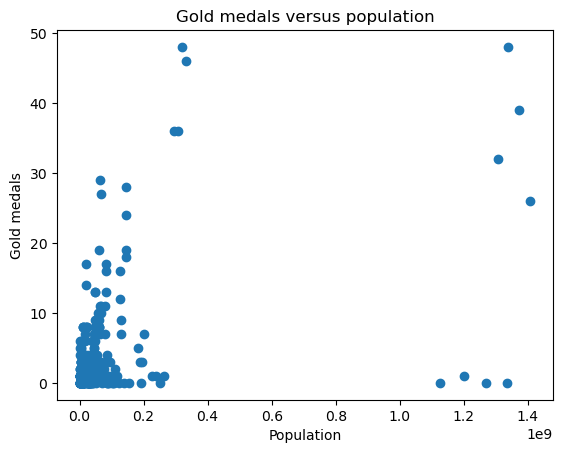

Pearson correlation: 0.4558291509445642


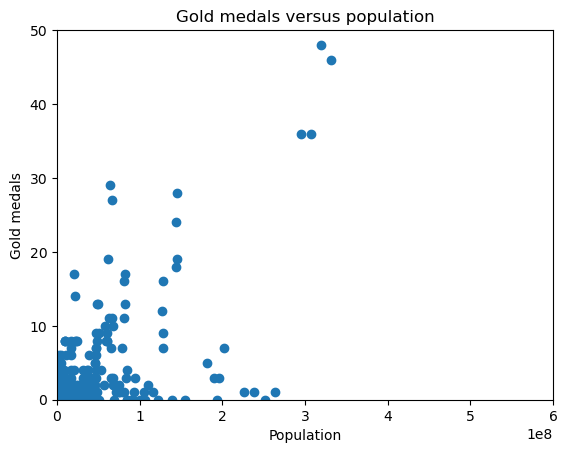

Pearson correlation: 0.5810284089785782


<Figure size 640x480 with 0 Axes>

In [74]:
plt.scatter(medals_GDP_population.population, medals_GDP_population.gold)
plt.xlabel('Population')
plt.ylabel('Gold medals')
plt.title('Gold medals versus population')
plt.show()
plt.clf()

corr, p = pearsonr(medals_GDP_population.population, medals_GDP_population.gold)
print('Pearson correlation:', corr)


plt.scatter(medals_GDP_population_trimmed.population, medals_GDP_population_trimmed.gold)
plt.xlabel('Population')
plt.ylabel('Gold medals')
plt.title('Gold medals versus population')
plt.axis([0, 600000000, 0, 50])
plt.show()
plt.clf()

corr, p = pearsonr(medals_GDP_population_trimmed.population, medals_GDP_population_trimmed.gold)
print('Pearson correlation:', corr)


* The appears to be a positive correlation between the number of gold medals won by a Country and their population with larger countries collecting more gold medals.
* This relationship have a Pearson correlation of 0.46 showing that there is a association between the two variables
* There are 8 outliers in the data. Closer inspection found these to be The People's Republic of China and India. 
* If these outliers are removed the Pearson correlation increases to 0.58 showing a much stronger relationship.

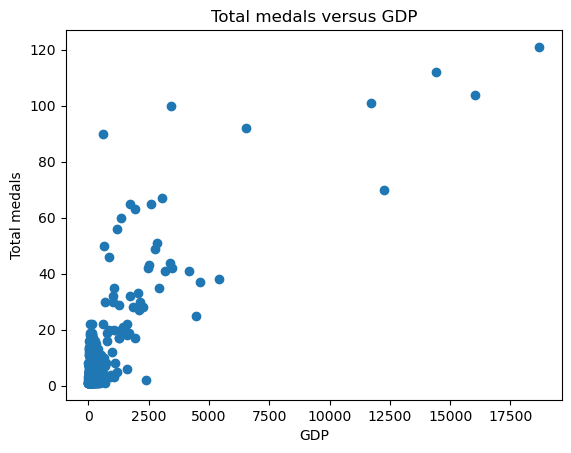

Pearson correlation: 0.8033994669875486


<Figure size 640x480 with 0 Axes>

In [75]:
plt.scatter(medals_GDP_population.GDP, medals_GDP_population.total)
plt.xlabel('GDP')
plt.ylabel('Total medals')
plt.title('Total medals versus GDP')
plt.show()
plt.clf()

corr, p = pearsonr(medals_GDP_population.GDP, medals_GDP_population.total)
print('Pearson correlation:', corr)

* There is a strong, positive correlation (Pearson coefficient: 0.80) between the total number of medals won by a country and their GDP with the richer countries winning more medals. 

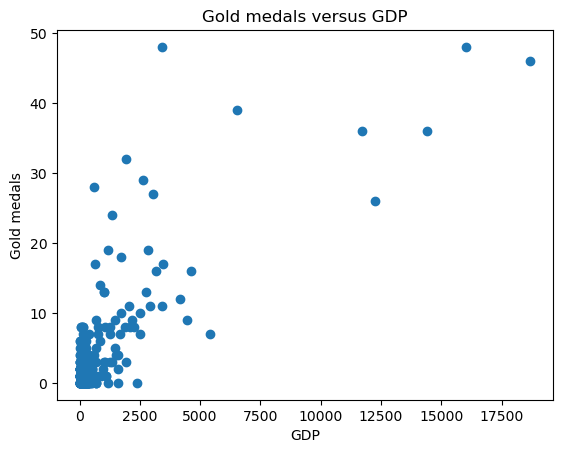

Pearson correlation: 0.7851264562605518


<Figure size 640x480 with 0 Axes>

In [76]:
plt.scatter(medals_GDP_population.GDP, medals_GDP_population.gold)
plt.xlabel('GDP')
plt.ylabel('Gold medals')
plt.title('Gold medals versus GDP')
plt.show()
plt.clf()


corr, p = pearsonr(medals_GDP_population.GDP, medals_GDP_population.gold)
print('Pearson correlation:', corr)

* There is a strong, positive correlation (Pearson coefficient: 0.79) between the number of gold medals won by a country and their GDP with the richer countries winning more gold medals. 